# PBMC scQuint Differential Splicing 5prime

In [1]:
##Differential intron splicing analysis using scQuint. Scripts by Gonzalo Benegas and Derek Bogdanoff

In [2]:
!date

Sun Aug 18 22:56:03 PDT 2024


In [3]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/scquint_4


In [4]:
#analysis approach from:
#https://github.com/songlab-cal/scquint/blob/main/differential_splicing_example.ipynb

In [5]:
import anndata

import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from scquint.differential_splicing import run_differential_splicing
from scquint.data import calculate_PSI

/c4/home/derek/miniconda3/envs/scquint_4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from scquint.data import calculate_PSI
from scquint.differential_splicing import run_differential_splicing, run_differential_splicing_for_each_group, find_marker_introns, mask_PSI
from scquint.dimensionality_reduction.pca import run_pca

In [8]:
input_dir = output_dir= '/c4/home/derek/data1/derek/data_scSLR/PBMC/'

In [9]:
# adata_spl = sc.read_h5ad(input_dir+'5prime_adata_spl_v2.h5ad')

In [10]:
adata_spl = sc.read_h5ad('./singlets_spl_PBMC_5prime.h5ad')

In [11]:
groupby = "celltype"
adata_spl.obs[groupby].value_counts()

Classic monocytes               5717
Memory CD4 T cells              2419
Naïve CD4 T cells               2218
Memory CD8 T cells              2052
B cells                         1810
NK cells                        1474
Non-classic monocytes           1136
Naive CD8 T cells                726
γδ T cells                       511
Regulatory CD4 T cells           316
Dendritic cells                  258
Plasmablasts                     186
MAIT cells                       129
Hematopoietic progenitors         90
Plasmacytoid dendritic cells      45
Name: celltype, dtype: int64

In [12]:
groups_test = adata_spl.obs[groupby].cat.categories

In [13]:
groups_test

Index(['B cells', 'Plasmablasts', 'Naïve CD4 T cells', 'Memory CD4 T cells',
       'Regulatory CD4 T cells', 'Naive CD8 T cells', 'Memory CD8 T cells',
       'MAIT cells', 'γδ T cells', 'NK cells', 'Classic monocytes',
       'Non-classic monocytes', 'Dendritic cells',
       'Plasmacytoid dendritic cells', 'Hematopoietic progenitors'],
      dtype='object')

In [15]:
%%time


diff_spl_intron_groups, diff_spl_introns = run_differential_splicing_for_each_group(
    adata_spl, 
    groupby, 
    groups=groups_test,
    subset_to_groups=True,
    min_cells_per_intron_group=10, 
    min_total_cells_per_intron=10, 
    n_jobs=-1,
)

B cells
sample sizes:  1810 17277
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 11629)
Number of intron groups:  4801
Number of introns:  11629


100%|██████████████████████████████████████| 4801/4801 [00:38<00:00, 126.04it/s]


Plasmablasts
sample sizes:  186 18901
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 8061)
Number of intron groups:  3284
Number of introns:  8061


100%|██████████████████████████████████████| 3284/3284 [00:30<00:00, 108.83it/s]


Naïve CD4 T cells
sample sizes:  2218 16869
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 12226)
Number of intron groups:  5065
Number of introns:  12226


100%|██████████████████████████████████████| 5065/5065 [00:37<00:00, 135.36it/s]


Memory CD4 T cells
sample sizes:  2419 16668
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 14742)
Number of intron groups:  6222
Number of introns:  14742


100%|██████████████████████████████████████| 6222/6222 [00:44<00:00, 138.42it/s]


Regulatory CD4 T cells
sample sizes:  316 18771
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 4860)
Number of intron groups:  1887
Number of introns:  4860


100%|███████████████████████████████████████| 1887/1887 [00:21<00:00, 87.90it/s]


Naive CD8 T cells
sample sizes:  726 18361
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 7577)
Number of intron groups:  3033
Number of introns:  7577


100%|███████████████████████████████████████| 3033/3033 [00:31<00:00, 95.70it/s]


Memory CD8 T cells
sample sizes:  2052 17035
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 12590)
Number of intron groups:  5228
Number of introns:  12590


100%|██████████████████████████████████████| 5228/5228 [00:39<00:00, 130.74it/s]


MAIT cells
sample sizes:  129 18958
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 2060)
Number of intron groups:  771
Number of introns:  2060


100%|█████████████████████████████████████████| 771/771 [00:13<00:00, 58.83it/s]


γδ T cells
sample sizes:  511 18576
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 6466)
Number of intron groups:  2545
Number of introns:  6466


100%|███████████████████████████████████████| 2545/2545 [00:30<00:00, 84.56it/s]


NK cells
sample sizes:  1474 17613
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 11479)
Number of intron groups:  4732
Number of introns:  11479


100%|██████████████████████████████████████| 4732/4732 [00:36<00:00, 129.11it/s]


Classic monocytes
sample sizes:  5717 13370
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 16565)
Number of intron groups:  7096
Number of introns:  16565


100%|██████████████████████████████████████| 7096/7096 [00:45<00:00, 155.57it/s]


Non-classic monocytes
sample sizes:  1136 17951
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 12852)
Number of intron groups:  5374
Number of introns:  12852


100%|██████████████████████████████████████| 5374/5374 [00:40<00:00, 131.85it/s]


Dendritic cells
sample sizes:  258 18829
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 8106)
Number of intron groups:  3259
Number of introns:  8106


100%|██████████████████████████████████████| 3259/3259 [00:31<00:00, 102.75it/s]


Plasmacytoid dendritic cells
sample sizes:  45 19042
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 1490)
Number of intron groups:  555
Number of introns:  1490


100%|█████████████████████████████████████████| 555/555 [00:11<00:00, 49.26it/s]


Hematopoietic progenitors
sample sizes:  90 18997
(19087, 28423)
filter_min_cells_per_feature
filter_singletons
(19087, 18523)
filter_min_global_proportion
filter_singletons
(19087, 18326)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(19087, 4604)
Number of intron groups:  1814
Number of introns:  4604


100%|███████████████████████████████████████| 1814/1814 [00:21<00:00, 85.67it/s]


CPU times: user 7min 14s, sys: 54.7 s, total: 8min 9s
Wall time: 10min 15s


In [16]:
# diff_spl_intron_groups.to_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_intron_groups_5prime')

In [17]:
# diff_spl_introns.to_csv('/c4/home/derek/data1/derek/data_scSLR/PBMC/diff_introns_5prime')

In [25]:
sig_diff_spl_intron_groups = diff_spl_intron_groups.query('p_value_adj < 0.05')
sig_diff_spl_introns = diff_spl_introns[diff_spl_introns.intron_group.isin(sig_diff_spl_intron_groups.name)]

print(f'significant DS intron groups by celltype shape: {sig_diff_spl_intron_groups.shape} \n')

print(f'number of unique significant intron groups: {sig_diff_spl_intron_groups.gene_name.nunique()} \n')

print(f'number of unique significant intron groups:  {sig_diff_spl_introns.name.unique().shape} \n')

significant DS intron groups by celltype shape: (2042, 12) 

number of unique significant intron groups: 1096 

number of unique significant intron groups:  (3195,) 



Text(0.5, 1.0, 'cell counts per celltype')

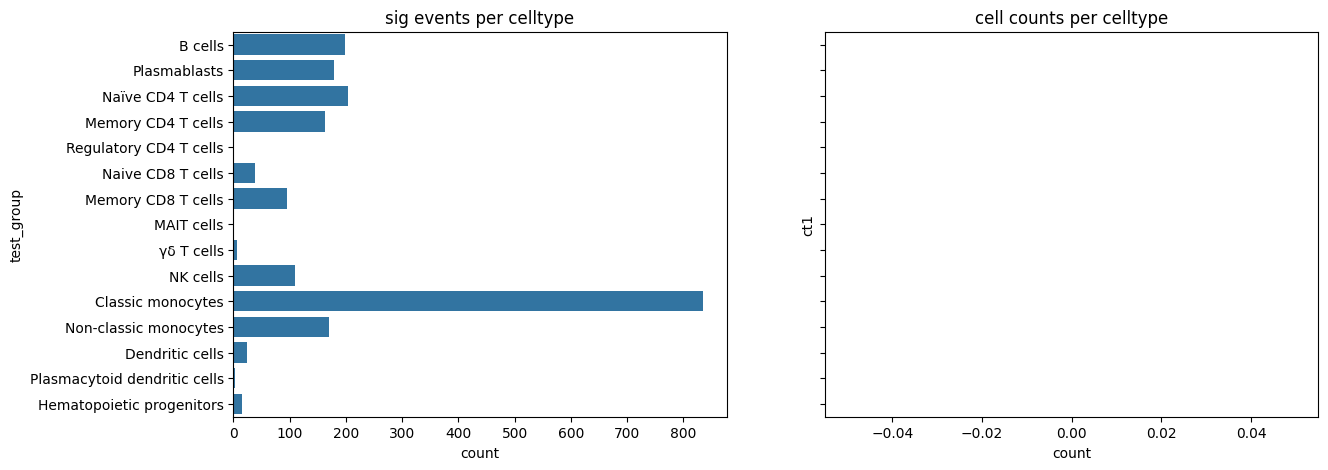

In [26]:
# Number of significant events per cell type
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)


sns.countplot(sig_diff_spl_intron_groups, y="test_group", color="C0", order=groups_test, ax=axes[0])
axes[0].set_title('sig events per celltype')

sns.countplot(adata_spl.obs, y='ct1', color="C0", order=groups_test, ax=axes[1])
axes[1].set_title('cell counts per celltype')

In [27]:
adata_spl.layers["PSI_raw"] = calculate_PSI(adata_spl)


/c4/home/derek/bin/scquint/scquint/data.py:212: RuntimeWarning: invalid value encountered in divide
  return X / intron_group_sums[:,groups]


In [28]:
adata_spl

AnnData object with n_obs × n_vars = 19087 × 28423
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal', 'celltype'
    var: 'chromosome', 'start

In [29]:
groups_test

Index(['B cells', 'Plasmablasts', 'Naïve CD4 T cells', 'Memory CD4 T cells',
       'Regulatory CD4 T cells', 'Naive CD8 T cells', 'Memory CD8 T cells',
       'MAIT cells', 'γδ T cells', 'NK cells', 'Classic monocytes',
       'Non-classic monocytes', 'Dendritic cells',
       'Plasmacytoid dendritic cells', 'Hematopoietic progenitors'],
      dtype='object')

In [30]:
marker_introns = find_marker_introns(
    sig_diff_spl_intron_groups, diff_spl_introns, 10, min_delta_psi=0.5,
)
marker_introns = {c: marker_introns[c] for c in groups_test} # just reordering
marker_introns

{'B cells': ['HSPA4_chr5:133103554-133103864',
  'PKIG_chr20:44582732-44589796',
  'PIK3AP1_chr10:96656935-96700802',
  'IGHJ6_chr14:105856218-105863197',
  'IGHJ4_chr14:105856218-105864214',
  'LHPP_chr10:124612951-124613263',
  'MYO1C_chr17:1484304-1485693',
  'ARHGAP15_chr2:143228669-143250510',
  'CENPM_chr22:41939197-41940138',
  'PLEKHA2_chr8:38901893-38917906'],
 'Plasmablasts': ['PRDM1_chr6:106095735-106099299',
  'NCOA2_chr8:70216765-70216996',
  'C19orf38_chr19:10868171-10869217',
  'ST6GAL1_chr3:186996674-187038741',
  'PTP4A3_chr8:141418019-141421387',
  'MDM2_chr12:68809087-68809207',
  'FNDC3A_chr13:48976918-49006151',
  'HDLBP_chr2:241268542-241272760',
  'FAM49B_chr8:129903351-129939607',
  'FAM117A_chr17:49732721-49747180'],
 'Naïve CD4 T cells': ['ZNF331_chr19:53554694-53555844',
  'ABO_chr9:133251153-133252477',
  'FLT3LG_chr19:49474452-49474602',
  'CBWD2_chr2:113438023-113439019',
  'LDLRAP1_chr1:25562979-25563069',
  'PCGF5_chr10:91163082-91222688',
  'RNH1_chr11:

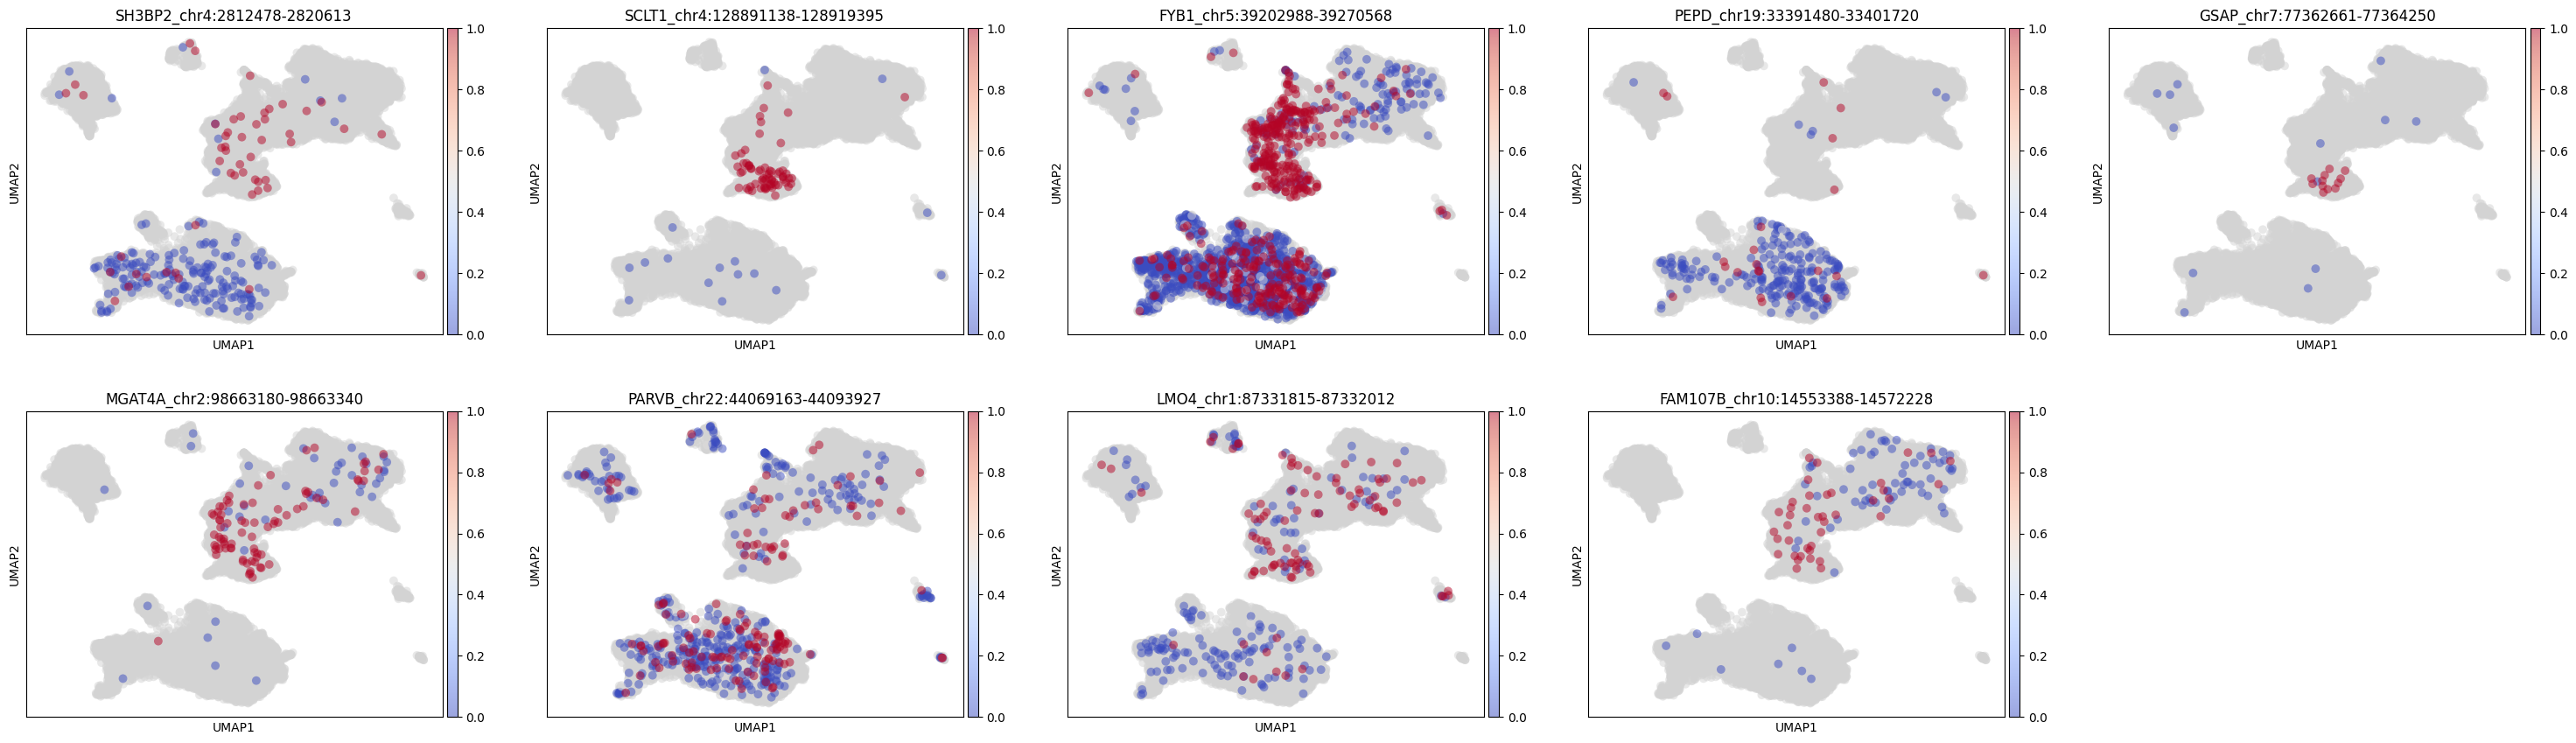

In [35]:
sc.pl.umap(
    adata_spl,
    color= [
        # 'TRAC_chr14:22473941-22547505',
  'SH3BP2_chr4:2812478-2820613',
  'SCLT1_chr4:128891138-128919395',
  'FYB1_chr5:39202988-39270568',
  'PEPD_chr19:33391480-33401720',
  'GSAP_chr7:77362661-77364250',
  'MGAT4A_chr2:98663180-98663340',
  'PARVB_chr22:44069163-44093927',
  'LMO4_chr1:87331815-87332012',
  'FAM107B_chr10:14553388-14572228'],
    cmap='coolwarm',
    layer="PSI_raw", vmin=0, vmax=1, ncols=5, size=200, alpha=0.5,
)


In [22]:
marker_introns = find_marker_introns(
    sig_diff_spl_intron_groups, diff_spl_introns, 10, min_delta_psi=0.3,
)
marker_introns = {c: marker_introns[c] for c in groups_test} # just reordering
marker_introns

{'cM': ['DOCK8_chr9:271730-286460',
  'SH3KBP1_chrX:19746442-19836124',
  'FOXP1_chr3:71299881-71359149',
  'TSPAN4_chr11:844187-847200',
  'CCND3_chr6:41940586-41941451',
  'CMC1_chr3:28263381-28316332',
  'NCOA4_chr10:46016695-46023329',
  'PAFAH1B3_chr19:42302326-42302698',
  'TRG-AS1_chr7:38350451-38375556',
  'TMEM170A_chr16:75451840-75464467'],
 'T4': ['LIMS1_chr2:108621462-108659604',
  'RNH1_chr11:502250-507112',
  'FAM200B_chr4:15681785-15686235',
  'CYLD_chr16:50742217-50742761',
  'PCGF5_chr10:91163082-91222688',
  'SET_chr9:128689656-128691169',
  'SMAP2_chr1:40374224-40406735',
  'ARID5B_chr10:62049484-62050887',
  'RASSF1_chr3:50332155-50337172',
  'DGKA_chr12:55931345-55936422'],
 'T8': ['FGR_chr1:27625152-27626459'],
 'B': ['PTPRC_chr1:198702531-198703297',
  'ARHGAP15_chr2:143228669-143250510',
  'TANK_chr2:161137064-161179613'],
 'NK': ['FYB1_chr5:39202988-39270568', 'AC092821.3_chr12:9645394-9653682'],
 'ncM': ['WARS_chr14:100369259-100375282', 'WIPF1_chr2:174585612-

In [28]:
genedf = sc.get.obs_df(
        adata_spl[adata_spl.obs['ct1'].isin(groups_test)],
        layer = 'PSI_raw',
        keys=["ct1", *temp[temp['delta_psi'] > .20]['name'].tolist()]
    )
grouped = genedf.groupby("ct1")
mean, var = grouped.mean(), grouped.var()

In [29]:
mean.shape

(9, 177)

In [30]:
##remove offending gene
mean = mean.loc[:, ~mean.columns.str.startswith('AC092821.3')]

In [31]:
mean.shape

(9, 175)

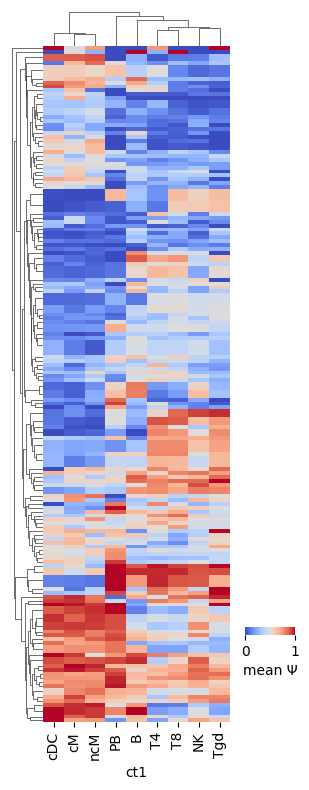

In [32]:
h = sns.clustermap(mean.fillna(0).T,
               cmap="coolwarm",
               figsize=(2.5,8),
               yticklabels=False,
               metric='euclidean',
          #     mask=(np.isinf(mean) |  np.isnan(mean))
               dendrogram_ratio=(.15,.05),
               cbar_pos=(1, .2, .2, .01),
               cbar_kws={'orientation':'horizontal','label':'mean Ψ'}

              )



In [33]:
mean

,PTPRC_chr1:198692374-198699563,ZNF487_chr10:43437263-43454064,NCOA4_chr10:46016695-46023329,PCGF5_chr10:91220837-91222688,RNH1_chr11:502250-504426,TSPAN4_chr11:844187-847200,RNF41_chr12:56216614-56221759,MAPKAPK5-AS1_chr12:111840478-111841683,TAOK3_chr12:118266760-118372647,GMPR2_chr14:24232978-24233218,...,RPS24_chr10:78037305-78040614,VPS29_chr12:110496204-110499534,ERP29_chr12:112019895-112022149,METTL5_chr2:169824641-169824781,HDLBP_chr2:241268542-241272760,SNU13_chr22:41680365-41688793,MRPL22_chr5:154950939-154956370,MGAT1_chr5:180793098-180802679,DECR1_chr8:90017327-90018908,SET_chr9:128684008-128691169
ct1,,,,,,,,,,,,,,,,,,,,,
B,0.176471,0.521739,0.037037,0.460000,0.210526,0.000000,0.226190,0.166667,0.634146,0.851852,...,0.336692,0.401961,0.659664,0.302817,0.318182,0.650926,0.593750,0.375000,0.750000,0.673077
NK,0.423462,0.083333,0.105263,0.770492,0.250000,0.000000,0.280000,0.375000,0.812500,0.304348,...,0.501412,0.466165,0.836134,0.388889,0.233333,0.846939,0.700000,0.409091,0.680000,0.367257
PB,0.440000,0.000000,0.000000,0.903226,0.240741,0.200000,0.833333,0.666667,0.666667,0.363636,...,0.937911,0.759111,0.932432,0.586667,0.857384,0.971277,0.972222,0.784314,0.982759,0.835486
T4,0.813643,0.558824,0.036458,0.336589,0.080000,0.000000,0.317073,0.519481,0.626050,0.292929,...,0.387788,0.512937,0.641540,0.418763,0.060109,0.763555,0.648936,0.400000,0.705789,0.216296
T8,0.755753,0.117647,0.032787,0.369565,0.025000,0.000000,0.333333,0.357143,0.705882,0.282051,...,0.419556,0.444206,0.744505,0.442857,0.043478,0.784038,0.596774,0.400000,0.627193,0.215152
Tgd,0.718750,0.000000,0.090909,0.473684,0.000000,0.000000,0.285714,1.000000,0.666667,0.250000,...,0.411633,0.500000,0.847458,0.266667,0.000000,0.772727,0.571429,0.400000,0.617647,0.270833
cDC,0.932203,0.333333,0.390625,0.925926,0.163636,0.363636,0.846154,0.600000,0.875000,0.583333,...,0.639241,0.511299,0.769231,0.403846,0.192308,0.750000,0.719298,0.537037,0.833333,0.741935
cM,0.949649,0.632812,0.550532,0.943925,0.376992,0.692308,0.716495,0.701613,1.000000,0.653179,...,0.584179,0.466952,0.721772,0.368512,0.150362,0.756737,0.782895,0.475410,0.767574,0.773930
ncM,0.838964,0.090909,0.395349,0.931548,0.229494,0.365385,0.750000,0.666667,0.972222,0.700000,...,0.359964,0.591540,0.737089,0.327586,0.252941,0.752193,0.787500,0.583333,0.790441,0.769531


### plot gene expression for relevant genes

In [148]:
adata_exp = anndata.read_h5ad("/c4/home/derek/data1/derek/data_scSLR/PBMC/gene_expression.h5ad")
adata_exp

AnnData object with n_obs × n_vars = 20673 × 18450
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'feature_types', 'genome', 'gene

In [171]:
genedf_genes = sc.get.obs_df(
        adata_exp[adata_exp.obs['ct1'].isin(groups_test)],
      #  layer = 'PSI_raw',
        keys=[x for x in ["ct1", *temp[temp['delta_psi'] > .20]['gene_name'].tolist()] if x != 'AC092821.3']
    )
grouped_genes = genedf_genes.groupby("ct1")
mean_genes, var_genes = grouped_genes.mean(), grouped_genes.var()

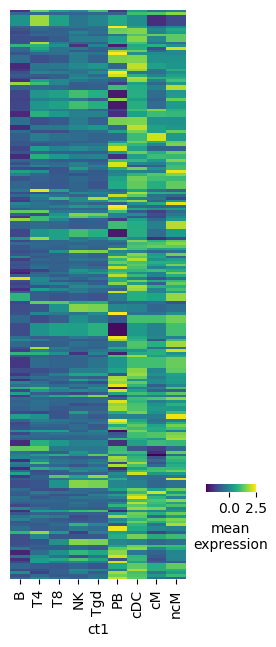

In [190]:
c = sns.clustermap(mean_genes.fillna(0).T,
               cmap="viridis",
               figsize=(2.5,8),
               yticklabels=False,
          #     metric='euclidean',
          #     mask=(np.isinf(mean) |  np.isnan(mean))
          #     dendrogram_ratio=(0,0),
               row_linkage=h.dendrogram_row.linkage,
               col_linkage=h.dendrogram_col.linkage,
               cbar_pos=(1.02, .2, .2, .01),
               cbar_kws={'orientation':'horizontal','label':'mean\nexpression'},
               z_score=0,
            #   standard_scale=1,
                   # vmax=1,
                   # vmin=-1
              )

c.ax_row_dendrogram.set_visible(False)
c.ax_col_dendrogram.set_visible(False)

### sashimi tracks

In [230]:
import os
from pybiomart import Dataset
from pygenometracks import tracks
from IPython.display import Image

In [216]:
os.makedirs('./sashimi_plots', exist_ok=True)

In [217]:
sashimi_introns = diff_spl_introns[diff_spl_introns['gene_name'] == "PTPRC"]

In [218]:
sashimi_introns.head()

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,...,intron_group_size,n_genes_per_intron_group,psi_a,psi_b,delta_psi,lfc_psi,abs_delta_psi,abs_lfc_psi,test_group,name
306,chr1,198692374,198699563,+,1,2666,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.819360,0.642666,0.176694,0.350428,0.176694,0.350428,cM,PTPRC_chr1:198692374-198699563
307,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.180640,0.357334,-0.176694,-0.984158,0.176694,0.984158,cM,PTPRC_chr1:198696910-198699563
308,chr1,198692374,198703297,+,1,1654,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.315574,0.272767,0.042806,0.210307,0.042806,0.210307,cM,PTPRC_chr1:198692374-198703297
309,chr1,198699705,198703297,+,1,2648,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.506657,0.445208,0.061449,0.186531,0.061449,0.186531,cM,PTPRC_chr1:198699705-198703297
310,chr1,198702531,198703297,+,1,1565,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.177769,0.282025,-0.104256,-0.665818,0.104256,0.665818,cM,PTPRC_chr1:198702531-198703297


In [219]:
groups_test

['cM', 'T4', 'T8', 'B', 'NK', 'ncM', 'Tgd', 'cDC', 'PB']

In [220]:
link_files=[]

for name in groups_test:
    if name in sashimi_introns.test_group.unique():
        
        link_files.append(name)
        
        sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]
        
        number_introns = sashimi_introns_.iloc[[0]].intron_group_size.values[0]
        
        f = open(f"./sashimi_plots/link_{name}.txt", "w")
        
        for intron in range(number_introns):
            f.write(str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['psi_a'].values[0])+'\n'
                   )

/c4/home/derek/miniconda3/envs/scquint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


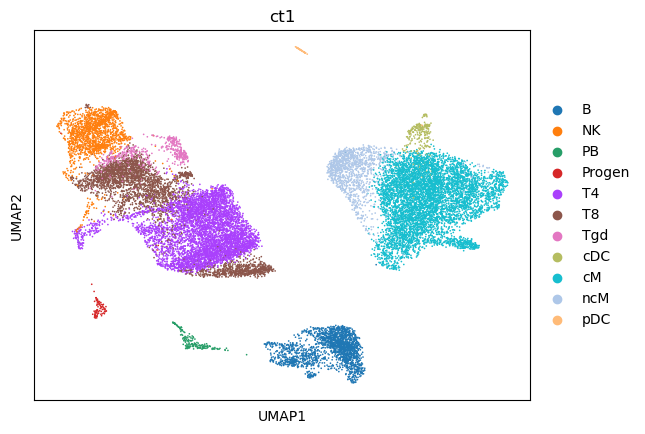

In [222]:
sc.pl.umap(adata_spl,
           color='ct1'
          )

In [223]:
colors = pd.DataFrame(adata_spl.uns['ct1_colors'],
             index=adata_spl.obs['ct1'].cat.categories,
             columns=['color']
        
            )

In [224]:
link_files[1:-2]

['T4', 'T8', 'B', 'NK', 'ncM', 'Tgd']

In [226]:
##write ini file

ini_file = """
[spacer]
height = 0.1
"""

bw_path = '/c4/home/derek/data1/derek/data_scSLR/PBMC/concat_BAMS/'

for name in link_files[1:-2]:

    ini_file = ini_file + f"""

[sashimi file test]
title = {name}
link_file = ./sashimi_plots/link_{name}.txt
# Path to bigwig file
bw_file = {bw_path}/{name}.bw
# Path to links file
height = 10
bw_color = {colors.loc[name]['color']}
number_of_bins = 1000
# max_value = 12
nans_to_zeros = true
summary_method = mean
show_data_range = true
link_color ={colors.loc[name]['color']}
#line_style =
fontsize = 10
# operation = log(bw_file + 1)
# The link in Sashimi plot is a Bezier curve.
# The height of the curve is calculated from the length of the intron.
# When the y-axis in bigwig track is different, the height of curve needs to be scaled.
scale_link_height = 2
# The line width for links is proportion to the numbers at the last column in links file (PSI).
# But the absolute width is calculated from the supplied numbers, which can look too thin or too wide sometimes.
# Use scale_line_width to scale the absolute line widths.
# You may need to try several values to get a satisfying result.
scale_link_height = 3
scale_line_width = 3
show_number = true
file_type = sashimiBigWig


"""

ini_file = ini_file + """
[spacer]
height = 1

[genes]
color = black  
file = /c4/home/derek/data1/HDD-2/derek/reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
height = 7
# title = gtf
# fontsize = 10
file_type = gtf
gene_rows = 10

"""
    
print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))


    


In [227]:
from pybiomart import Dataset

dataset = Dataset(name='hsapiens_gene_ensembl',
                  host='http://www.ensembl.org')

genes = dataset.query(attributes=['external_gene_name','chromosome_name','start_position','end_position'],
              )

In [228]:
genes[genes['Gene name'] == 'PTPRC']

,Gene name,Chromosome/scaffold name,Gene start (bp),Gene end (bp)
1900,PTPRC,CHR_HSCHR1_3_CTG31,198650158,198733963
68345,PTPRC,1,198638457,198757476


In [1]:
!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --region 'chr1:198638457-198757476' -o ./sashimi_plots/sashimi_PTPRC.png


INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [sashimi file test]
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 3152.43it/s]
INFO:pygenometracks.tracksClass:initialize 3. [sashimi file test]
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 4452.55it/s]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████████████████████████████████████| 26/26 [00:00<00:00, 604.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:7.145663022994995
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 29.893617021276597. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [sashimi file test]
DEBUG:pygenometracks.tracks.GenomeTrack:2 links plotted
INFO:pygenometracks.tracksClass:plotting 3. [sashimi file test]
DEBUG:pygenometr

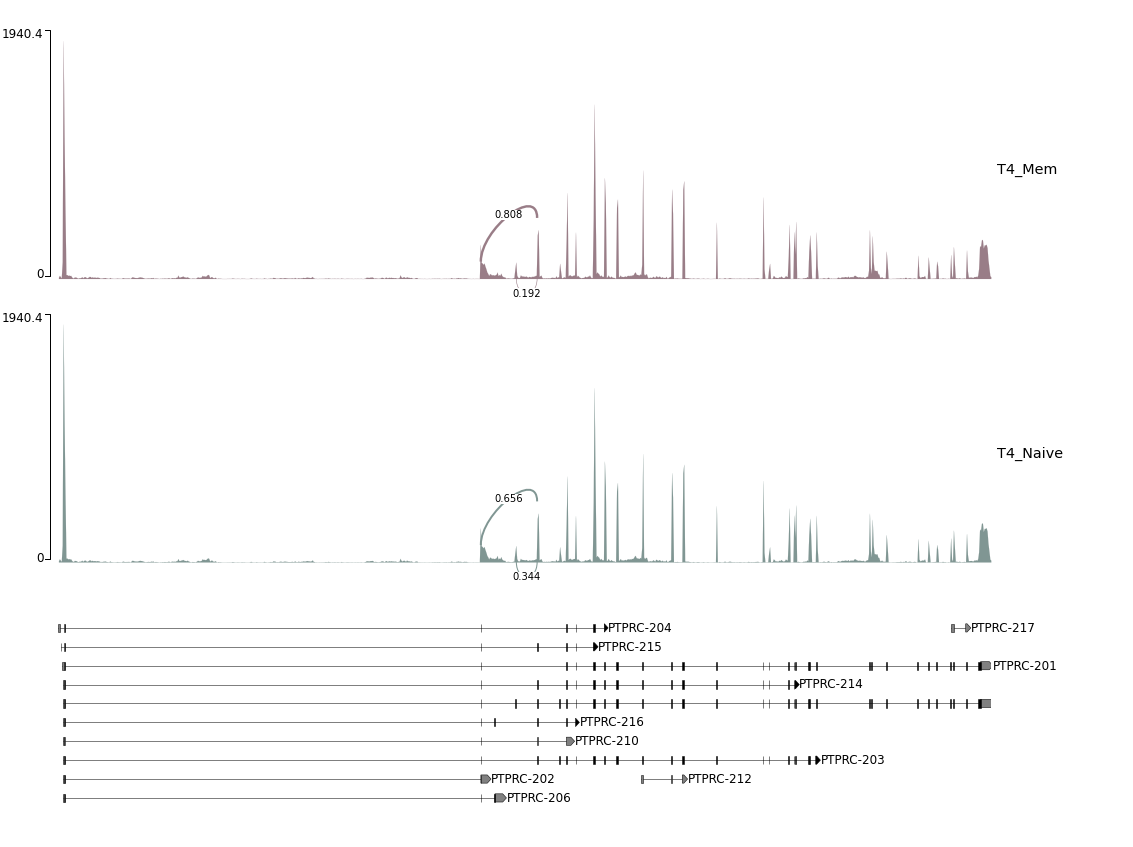

In [3]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_PTPRC.png',retina=False)

In [211]:
!conda list

# packages in environment at /c4/home/derek/miniconda3/envs/scquint:
#
# Name                    Version                   Build  Channel
_ipython_minor_entry_point 8.7.0                hb6b4a82_0    conda-forge
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
alsa-lib                  1.2.8                h166bdaf_0    conda-forge
anndata                   0.8.0              pyhd8ed1ab_1    conda-forge
anyio                     3.6.2              pyhd8ed1ab_0    conda-forge
appdirs                   1.4.4                    pypi_0    pypi
argcomplete               2.0.0                    pypi_0    pypi
argh                      0.26.2                   pypi_0    pypi
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h5764c6d_3    conda-forge
asciitree                 0.3.3                    pypi_0    pypi
asttokens    